# Implementing Neural Network from Scratch.
Neural Networks are really powerful algorithms used for classification. <br>
Dataset = Iris_Dataset <br>
Link = http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html <br>

### Import required libraries

In [324]:
from sklearn import datasets     #for dataset
import numpy as np               #for maths
import matplotlib.pyplot as plt  #for plotting

### Get Dataset

In [325]:
iris = datasets.load_iris()      #load the dataset
data = iris.data                 #get features  
target = iris.target             #get labels

shape = data.shape               #shape of data

#convert into numpy array
data = np.array(data).reshape(shape[0],shape[1])
target = np.array(target).reshape(shape[0],1)

#print shape
print("Data Shape   = {}".format(data.shape))
print("Target Shape = {}".format(target.shape))
print('Classes : {}'.format(np.unique(target)))
print('Sample data : {} , Target = {}'.format(data[70],target[70]))

Data Shape   = (150, 4)
Target Shape = (150, 1)
Classes : [0 1 2]
Sample data : [ 5.9  3.2  4.8  1.8] , Target = [1]


### Define Parameters and Hyperparameters






One hidden layer Neural Network.
 ![](https://github.com/navjindervirdee/neural-networks/blob/master/Neural%20Network/network.JPG?raw=true)
Input Units  = 4 <br>
Hidden Units = 8 <br>
Output Units = 3 <br>

In [326]:
#HYPERPARAMETERS

#num of target labels
num_classes = len(np.unique(target))

#define layer_neurons
input_units  = 4   #neurons in input layer
hidden_units = 8   #neurons in hidden layer
output_units = 3   #neurons in output layer

#define hyper-parameters
learning_rate = 0.03

#regularization parameter
beta = 0.00001

#num of iterations
iters = 4001

### Dimesions of Parameters
Shape of layer1_weights (Wxh) = (4,8)  <br>
Shape of layer1_biasess (Bh) = (8,1)  <br>
Shape of layer2_weights (Why) = (8,3)  <br>
Shape of layer2_biasess (By) = (3,1)  <br>

In [327]:
#PARAMETERS

#initialize parameters i.e weights
def initialize_parameters():
    #initial values should have zero mean and 0.1 standard deviation
    mean = 0        #mean of parameters 
    std = 0.03      #standard deviation
    
    layer1_weights = np.random.normal(mean,std,(input_units,hidden_units))          
    layer1_biases = np.ones((hidden_units,1))                                       
    layer2_weights = np.random.normal(mean,std,(hidden_units,output_units))
    layer2_biases = np.ones((output_units,1))
    
    parameters = dict()
    parameters['layer1_weights'] = layer1_weights
    parameters['layer1_biases'] = layer1_biases
    parameters['layer2_weights'] = layer2_weights
    parameters['layer2_biases'] = layer2_biases
    
    return parameters

### Activation Function

**Sigmoid**

![](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)


In [328]:
#activation function
def sigmoid(X):
    return 1/(1+np.exp((-1)*X))

#softmax function for output
def softmax(X):
    exp_X = np.exp(X)
    exp_X_sum = np.sum(exp_X,axis=1).reshape(-1,1)
    exp_X = (exp_X/exp_X_sum)
    return exp_X

### Define Utility Functions
#### 1. Forward Propagation
---- Logits = matmul(X,Wxh) + Bh       <br>
---- A = sigmoid(logits)       <br>
---- logits = matmul(A,Why) + By       <br>
---- output = softmax(logits)  <br>

Store output and A in cache to use it in backward propagation <br>

#### 2. Backward Propagation
---- Error_output = output - train_labels <br>
---- Error_activation = (matmul(error_output,Why.T))(A)(1-A) <br>
---- dWhy = (matmul(A.T,error_output))/m <br>
---- dWxh = (matmul(train_dataset.T,error_activation))/m <br>

m = len(train_dataset) <br>
Store derivatives in derivatives dict

#### 3. Update Parameters
---- Wxh = Wxh - learning_rate(dWxh + beta*Wxh) <br>
---- Why = Why - learning_rate(dWhy + beta*Why) <br>

#### 4. Calculate Loss and Accuracy
---- Loss = (-1(Y log(prediction)) + (1-Y) (log(1-predictions)))  + beta * (sum(Wxh^2) + sum(Why^2)))/m  <br>
---- Accuracy = sum(Y==predictions)/m 

In [329]:
#forward propagation
def forward_propagation(train_dataset,parameters):
    cache = dict()            #to store the intermediate values for backward propagation
    m = len(train_dataset)    #number of training examples
    
    #get the parameters
    layer1_weights = parameters['layer1_weights']
    layer1_biases = parameters['layer1_biases']
    layer2_weights = parameters['layer2_weights']
    layer2_biases = parameters['layer2_biases']
    
    #forward prop
    logits = np.matmul(train_dataset,layer1_weights) + layer1_biases.T
    activation1 = np.array(sigmoid(logits)).reshape(m,hidden_units)
    activation2 = np.array(np.matmul(activation1,layer2_weights) + layer2_biases.T).reshape(m,output_units)
    output = np.array(softmax(activation2)).reshape(m,num_classes)
    
    #fill in the cache
    cache['output'] = output
    cache['activation1'] = activation1
    
    return cache,output

#backward propagation
def backward_propagation(train_dataset,train_labels,parameters,cache):
    derivatives = dict()         #to store the derivatives
    
    #get stuff from cache
    output = cache['output']
    activation1 = cache['activation1']
    
    #get parameters
    layer1_weights = parameters['layer1_weights']
    layer2_weights = parameters['layer2_weights']
    
    #calculate errors
    error_output = output - train_labels
    error_activation1 = np.matmul(error_output,layer2_weights.T)
    error_activation1 = np.multiply(error_activation1,activation1)
    error_activation1 = np.multiply(error_activation1,1-activation1)
    
    
    #calculate partial derivatives
    partial_derivatives2 = np.matmul(activation1.T,error_output)/len(train_dataset)
    partial_derivatives1 = np.matmul(train_dataset.T,error_activation1)/len(train_dataset)
    
    #store the derivatives
    derivatives['partial_derivatives1'] = partial_derivatives1
    derivatives['partial_derivatives2'] = partial_derivatives2
    
    return derivatives


#update the parameters
def update_parameters(derivatives,parameters):
    #get the parameters
    layer1_weights = parameters['layer1_weights']
    layer2_weights = parameters['layer2_weights']
    
    #get the derivatives
    partial_derivatives1 = derivatives['partial_derivatives1']
    partial_derivatives2 = derivatives['partial_derivatives2']
    
    #update the derivatives
    layer1_weights -= (learning_rate*(partial_derivatives1 + beta*layer1_weights))
    layer2_weights -= (learning_rate*(partial_derivatives2 + beta*layer2_weights))
    
    #update the dict
    parameters['layer1_weights'] = layer1_weights
    parameters['layer2_weights'] = layer2_weights
    
    return parameters
    
#calculate the loss and accuracy
def cal_loss_accuray(train_labels,predictions,parameters):
    #get the parameters
    layer1_weights = parameters['layer1_weights']
    layer2_weights = parameters['layer2_weights']
    
    #cal loss and accuracy
    loss = -1*np.sum(np.multiply(np.log(predictions),train_labels) + np.multiply(np.log(1-predictions),(1-train_labels)))/len(train_labels) + np.sum(layer1_weights**2)*beta/len(train_labels) + np.sum(layer2_weights**2)*beta/len(train_labels)
    accuracy = np.sum(np.argmax(train_labels,axis=1)==np.argmax(predictions,axis=1))
    accuracy /= len(train_dataset)
    
    return loss,accuracy

### Train Function

1. Initialize Parameters
2. Forward Propagation
3. Backward Propagation
4. Calculate Loss and Accuracy
5. Update the parameters

Repeat the steps 2-5 for the given number of iterations

In [330]:
#Implementation of 3 layer Neural Network

#training function
def train(train_dataset,train_labels,iters=2):
    #To store loss after every iteration.
    J = []
  
    #WEIGHTS
    global layer1_weights
    global layer1_biases
    global layer2_weights
    global layer2_biases
  
    #initialize the parameters
    parameters = initialize_parameters()
    
    layer1_weights = parameters['layer1_weights']
    layer1_biases = parameters['layer1_biases']
    layer2_weights = parameters['layer2_weights']
    layer2_biases = parameters['layer2_biases']
    
    #to store final predictons after training
    final_output = []
    
    for j in range(iters):
        #forward propagation
        cache,output = forward_propagation(train_dataset,parameters)
        
        #backward propagation
        derivatives = backward_propagation(train_dataset,train_labels,parameters,cache)
        
        #calculate the loss and accuracy
        loss,accuracy = cal_loss_accuray(train_labels,output,parameters)
        
        #update the parameters
        parameters = update_parameters(derivatives,parameters)
        
        #append loss
        J.append(loss)
        
        #update final output
        final_output = output
        
        #print accuracy and loss
        if(j%500==0):
            print("Step %d"%j)
            print("Loss %f"%loss)
            print("Accuracy %f%%"%(accuracy*100))
    
    return J,final_output

In [331]:
#shuffle the dataset
z = list(zip(data,target))
np.random.shuffle(z)
data,target = zip(*z)

#make train_dataset and train_labels
train_dataset = np.array(data).reshape(-1,4)
train_labels = np.zeros([train_dataset.shape[0],num_classes])

#one-hot encoding
for i,label in enumerate(target):
    train_labels[i,label] = 1

#normalizations
for i in range(input_units):
    mean = train_dataset[:,i].mean()
    std = train_dataset[:,i].std()
    train_dataset[:,i] = (train_dataset[:,i]-mean)/std

In [332]:
#train data
J,final_output = train(train_dataset,train_labels,iters=4001)

Step 0
Loss 1.911767
Accuracy 33.333333%
Step 500
Loss 1.772284
Accuracy 76.666667%
Step 1000
Loss 0.934929
Accuracy 93.333333%
Step 1500
Loss 0.648656
Accuracy 93.333333%
Step 2000
Loss 0.504929
Accuracy 96.000000%
Step 2500
Loss 0.413799
Accuracy 96.666667%
Step 3000
Loss 0.348909
Accuracy 96.666667%
Step 3500
Loss 0.301780
Accuracy 96.000000%
Step 4000
Loss 0.267607
Accuracy 97.333333%


#### Reached an Accuracy of 97%

### Plot the loss vs iteration graph

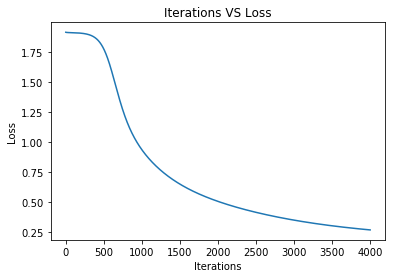

In [333]:
#plot loss graph
plt.plot(list(range(1,len(J))),J[1:])
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Iterations VS Loss')
plt.show()